More plotting options with Python
-------


Learning goals
----
* Learn how to use some of the most common functions from matplotlib.
* Familiarize with the online documentation.
* Rearange column data to use in 2-D plots
* Load .png files and show the images


Resources
----
Matplotlib documentation: http://matplotlib.org

More examples than you can imagine! http://matplotlib.org/gallery.html



Matplotlib
----

We already used this powerful library in past lessons. In this notebook, we will explore other 2-D plotting options. Let's start by loading this library with the alias plt, and the magic line %matplotlib inline, to show figures within the notebook. Let's also load the matrix manipulation library, numpy, as np.


In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

Example: Study of the swimming mechanics of $Artemia$ $Salina$
    ------
    
You are studying the swimming mechanics of the crustacean $Artemia$ $Salina$. During your research, you collected a lot of specimens, counted them, and measured the velocity of the flow around them with sophisticated experimental techniques. Now, you want to analize your data and present it in a practical and descriptive way for a publication. There are several types of plots that you will want to create: a pie chart showing the distribution of your sample (female adults, male adults, larvae, and juveniles), quiver plots for the velocity field and speed contour plots, among others. All of this graphics can be produced using matplotlib fuctions.

Who is in your sample? Pie charts
---


After hours and hours under the microscope, you finally identified the distribution of individuals in your sample. You found 1000 specimens divided in the following proportions: 48% nauplii, 32% juveniles, 13% adult females and 7% adult males. A clear way to show this is using a pie chart:

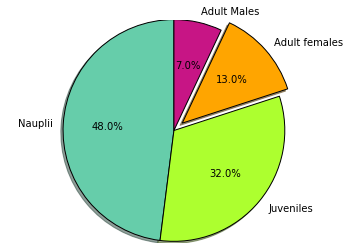

In [11]:
# The slices will be ordered and plotted counter-clockwise.

labels = 'Nauplii', 'Juveniles','Adult females','Adult Males'
sizes = [48, 32, 13, 7]
colors = ['mediumaquamarine', 'greenyellow', 'orange', 'mediumvioletred']
explode = (0, 0, 0.1, 0) # only "explode" the 3nd slice (i.e. Adult females)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()


What is the size of your specimens? Error bars
----

In one of your experiments, you measured the length of males and females from the moment of hatching through adulthood. The average and standard deviation of males and females is saved in a comma-separated values file (csv) called Size.csv. The data is arraged in 5 columns: day, average length of females, standard deviation of the female lenght measurements, average length of males and standard deviation of the male length measurements. We will load the data using the pandas function read_csv.

In [14]:
import pandas as pd # first, import pandas library

size_data = pd.read_csv('Size.csv',delimiter=',' ,names=['day','female','std_female','male','std_male']) 


We extract the fields into some new vaiables:

In [15]:
day = size_data['day']
female = size_data['female']
std_female = size_data['std_female']
male = size_data['male']
std_male = size_data['std_male']



And now, we will plot the results. To plot error bars we use the matplotlib function errorbar() instead of the already known plot().

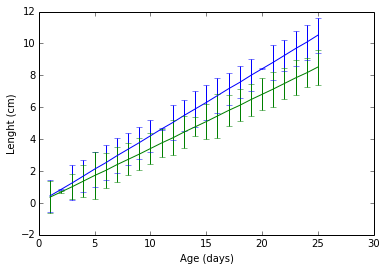

In [17]:
plt.errorbar(day,female,yerr=std_female)

plt.errorbar(day,male,yerr=std_male)

plt.ylabel('Lenght (cm)')

plt.xlabel('Age (days)')

plt.show()

Oops, which line corresponds to the length of female specimens average? We need to add a legend to te plot for clarity. To do that, we specify a label='text' in each plotting command and then call plt.legend(agruments):

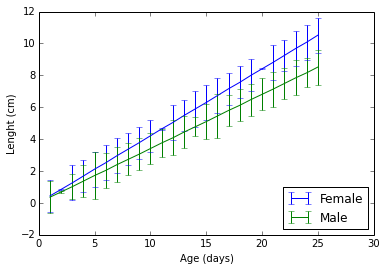

In [19]:
plt.errorbar(day,female,yerr=std_female, label='Female')

plt.errorbar(day,male,yerr=std_male, label='Male')

plt.legend(loc='lower right')

plt.ylabel('Lenght (cm)')

plt.xlabel('Age (days)')


plt.show()

How does it swim? Quiver and contour plots
----

We are going to load your velocity field measurements to plot them. They are in a comma-separated (csv) file called FlowVelocity.csv with 6 columns. So, we import the data into a variable called data.

In [20]:

data = pd.read_csv('FlowVelocity.csv',delimiter=',' ,names=['x','y','xpix','ypix','upix','vpix']) 



In [21]:
data


,x,y,xpix,ypix,upix,vpix
0,0,0,15.5,15.5,0.071535,-0.022171
1,1,0,31.5,15.5,0.073124,-0.020933
2,2,0,47.5,15.5,0.077090,-0.023317
3,3,0,63.5,15.5,0.090929,-0.027834
4,4,0,79.5,15.5,0.104639,-0.036333
5,5,0,95.5,15.5,0.117808,-0.040787
6,6,0,111.5,15.5,0.109902,-0.038375
7,7,0,127.5,15.5,0.111818,-0.029685
8,8,0,143.5,15.5,0.119335,-0.020628
9,9,0,159.5,15.5,0.138773,-0.017703


Now, the data is aranged in 6 columns and 7474 rows. This data has a value for each (x,y) pair in a mesh, but it is aranged in a looooong column (1-D) instead of a 2-D array. To plot the velocity field using quiver, we need the data in 2-D format (ordered in (x,y) pairs). To do that, we "reshape" the columns, i.e. we rearrange the elements of the columns from 1-D to 2-D without changing the total number of elements in the column. We will rearrange the columns that are 7474 rows x 1 column = 7474 elements into 101 rows x 74 columns = 7474 elements.

In [22]:
#Extract column
Xpix = data['xpix']
Ypix = data['ypix']
Upix = data['upix']
Vpix = data['vpix']

#Reshape column into (101,74) array and rescale into mm and mm/s
X=(np.reshape(Xpix, (101,74), order='F'))/55.374
Y=(np.reshape(Ypix, (101,74), order='F'))/55.374
U=(np.reshape(Upix, (101,74), order='F'))/(0.01*55.374)
V=(np.reshape(Vpix, (101,74), order='F'))/(0.01*55.374)


Now we have 2D arrays for the x and y positions and the horizontal and vertical components of velocity. To plot the velocity field (2-D vector field)using the function quiver, we need to specify these 4 quantities. Let's start a new figure and look at our velocity field:

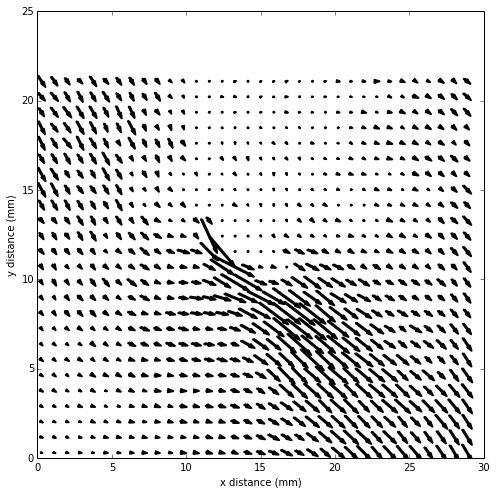

In [24]:
figure1 = plt.figure(figsize=(8,8))

step = 3

plt.quiver(X[::step,::step],Y[::step,::step],U[::step,::step],V[::step,::step],pivot='middle', linewidths=2,color='w')

plt.ylabel('y distance (mm)')

plt.xlabel('x distance (mm)')

plt.show()

The step = 3 snippet indicates that we will be plotting only each 3rd value, so that our plott does not look all stuffed. You can try different values to get more sparse or more crowded plots.

Loading .png images and plottig them
---

The quiver plot would be more clear if we could see where the animal is to give us a better idea of what is happening to the flow. One way to do this is to superimpose the quiver to an image taken at the same time of the velocity measurement. Luckily, or sophisticated lab technique allowed for that and we have an image file! Let's load it using the module image of the library matplotlib. The flunction imread form the module image can load png images (other formats are also supported, http://matplotlib.org/users/image_tutorial.html) and we can then plot them using imshow:

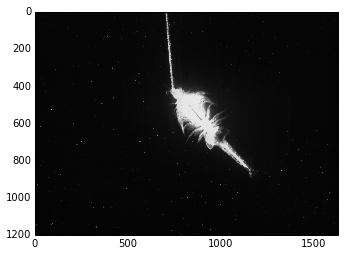

In [26]:
import matplotlib.image as mpimg

img=mpimg.imread('Artemia.png')

imgplot = plt.imshow(img)

We are ready to superimpose our quiver. First, we plot the image using imshow. We will add a new parameter "extent" to tell imshow what the limits of the axis are instead of using number of pixels. Then, we superimpose the quiver and add the show command at the end to prevent the image from showing before the quiver is imposed. What happens if you don't use extent? What happens if you don't use show( )?

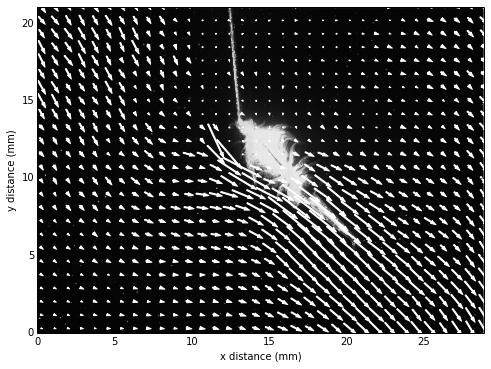

In [27]:
figure2 = plt.figure(figsize=(8,8))

plt.imshow(img,extent=[0,28.8,0,21])

step = 3

plt.quiver(X[::step,::step],Y[::step,::step],U[::step,::step],V[::step,::step],pivot='middle', linewidths=1,color='w',edgecolors='w')

plt.ylabel('y distance (mm)')

plt.xlabel('x distance (mm)')

plt.show()

Where is the maximum speed? Contour plots
----

The last analysis we want to do is find where the maximum speed is located and what the pattern of the flow speed is. One way to do that is using a contour plot. 

Let's start by computing the speed from the velocity field (i.e. the magnitude of the velocuty vectors):

In [29]:
spd = np.sqrt(U**2+ V**2)

spd

array([[ 0.13524775,  0.16744021,  0.19822987, ...,  1.08286306,
         1.16606326,  1.20753141],
       [ 0.13735962,  0.16717511,  0.19631305, ...,  1.08634589,
         1.0783865 ,  1.07608445],
       [ 0.14544527,  0.18168621,  0.21766221, ...,  1.054722  ,
         0.99267316,  0.96268907],
       ..., 
       [ 1.63946942,  1.61243544,  1.56989967, ...,  0.73785729,
         0.70568638,  0.6947527 ],
       [ 1.63240585,  1.62804213,  1.58835771, ...,  0.7738955 ,
         0.69249737,  0.65048719],
       [ 1.57255871,  1.59012763,  1.55217244, ...,  0.7597826 ,
         0.66317902,  0.61622369]])

We will use the functions contour and contourf. The latter creates filled or coloured contours and the former plain contour lines:

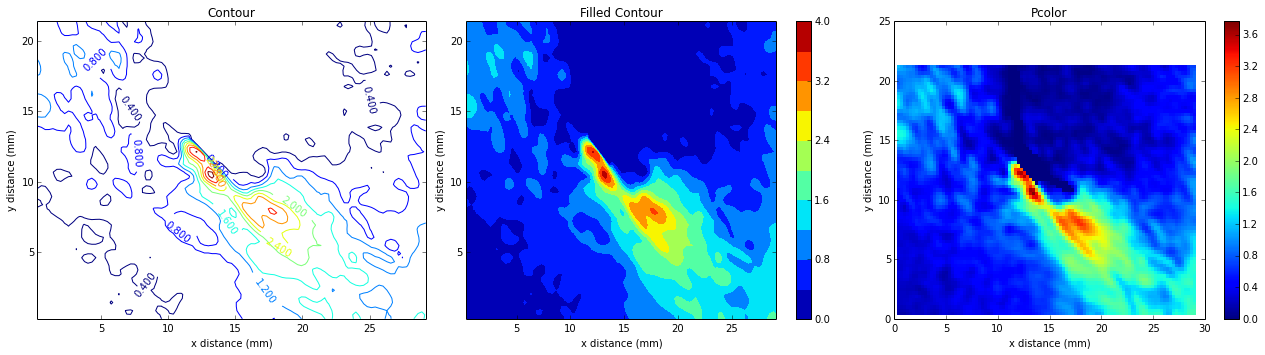

In [36]:
figure2 = plt.figure(figsize=(18,5))

plt.subplot(1,3,1)

CS=plt.contour(X,Y,spd,10)
plt.clabel(CS, inline=1, fontsize=10)
plt.ylabel('y distance (mm)')
plt.xlabel('x distance (mm)')
plt.title('Contour')

plt.subplot(1,3,2)

plt.contourf(X,Y,spd,10)
plt.colorbar()
plt.ylabel('y distance (mm)')
plt.xlabel('x distance (mm)')
plt.title('Filled Contour')

plt.subplot(1,3,3)

plt.pcolor(X,Y,spd)
plt.colorbar()
plt.ylabel('y distance (mm)')
plt.xlabel('x distance (mm)')
plt.title('Pcolor')

plt.tight_layout()

plt.show()

Challenge
---

What if we want to superimpose a filled contour (contourf) on the png image? For that we need the function alpha. Alpha is a parameter you can add to plots to manipulate the transparency of the lines. It is a float with values that go from 0.0 (transparent) through 1.0 opaque. Play around with this parameter to generate the sumerimposed figure. Remember that you can talk to each other and search the web!
